Objetivo: descobrir o artista mais escutado dos últimos tempos

In [181]:
#Importando as bibliotecas e o arquivo
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("spotify_history.csv")


In [182]:
#Convertendo a data para mês e ano, afim de ter uma melhor visualização
df['ts'] = pd.to_datetime(df['ts'])

In [183]:
#Criando uma coluna referente ao mês
df['Ano'] = df['ts'].dt.year

In [184]:
#Criando uma coluna referente ao ano
df['Mês'] = df['ts'].dt.month

In [185]:
#Apagando a antiga coluna referente as datas e a coluna da Url
df = df.drop(columns=['ts'])
df = df.drop(columns=['spotify_track_uri'])

In [186]:
#Descobrindo o nome das colunas
df.columns

Index(['platform', 'ms_played', 'track_name', 'artist_name', 'album_name',
       'reason_start', 'reason_end', 'shuffle', 'skipped', 'Ano', 'Mês'],
      dtype='object')

In [187]:
#Mudando o idioma das colunas
df = df.rename(columns={"platform": "Plataforma"})
df = df.rename(columns={"ms_played": "Mi_Tocados"})
df = df.rename(columns={"track_name": "Nome_Musica"})
df = df.rename(columns={"artist_name": "Nome_Artista"})
df = df.rename(columns={"album_name": "Nome_Album"})
df = df.rename(columns={"reason_start": "Motivo_Play"})
df = df.rename(columns={"reason_end": "Motivo_Parada"})
df = df.rename(columns={"shuffle": "Modo_Aleatorio"})
df = df.rename(columns={"skipped": "Pulada"})

In [188]:
#Conferindo se as mudanças estão corretas
df.head(5)

,Plataforma,Mi_Tocados,Nome_Musica,Nome_Artista,Nome_Album,Motivo_Play,Motivo_Parada,Modo_Aleatorio,Pulada,Ano,Mês
0,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False,2013,7
1,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False,2013,7
2,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False,2013,7
3,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False,2013,7
4,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False,2013,7


Após fazer todas as mudanças visando uma melhor visualização
Darei início as análises

In [189]:
#Descobrindo as 10 músicas mais tocadas
df['Nome_Musica'].value_counts().head(10)

Nome_Musica
Ode To The Mets                      207
In the Blood                         181
Dying Breed                          166
Caution                              164
19 Dias y 500 Noches - En Directo    148
For What It's Worth                  146
Concerning Hobbits                   142
All These Things That I've Done      142
Come Together - Remastered 2009      137
The Boxer                            135
Name: count, dtype: int64

In [190]:
#Descobrindo os 10 álbuns mais tocados
df['Nome_Album'].value_counts().head(10)

Nome_Album
The Beatles                              2063
Past Masters                             1672
Abbey Road                               1429
The Wall                                 1241
Revolver                                 1038
Help!                                     979
At Folsom Prison                          918
Sgt. Pepper's Lonely Hearts Club Band     910
Exile On Main Street                      892
Hot Fuss                                  878
Name: count, dtype: int64

In [191]:
#Descobrindo os artistas mais ouvidos
df['Nome_Artista'].value_counts().head(10)

Nome_Artista
The Beatles           13621
The Killers            6878
John Mayer             4855
Bob Dylan              3814
Paul McCartney         2697
Led Zeppelin           2482
Johnny Cash            2478
The Rolling Stones     2390
Radiohead              2305
The Black Keys         2231
Name: count, dtype: int64

Podemos observar que "The Beatles" lideram o spotify como artista 
mais escutado, e possui vários albuns no top 10.
Portanto, vamos investiga-los mais a fundo

In [192]:
#Criando um função especificamente para o The Beatles
df_beatles = df[df['Nome_Artista'].str.lower().str.strip() == 'the beatles']

In [193]:
#Descobrindo as músicas mais ouvidas
df_beatles['Nome_Musica'].value_counts().head(10)


Nome_Musica
Come Together - Remastered 2009                  137
Yesterday - Remastered 2009                      134
Baby, You're A Rich Man - Remastered 2009        119
The Ballad Of John And Yoko - Remastered 2009    113
In My Life - Remastered 2009                     113
All You Need Is Love - Remastered 2009           109
I Will - Remastered 2009                         105
For No One - Remastered 2009                     105
Strawberry Fields Forever - Remastered 2009      104
I'm So Tired - Remastered 2009                   103
Name: count, dtype: int64

In [194]:
#Descobrindo os álbuns mais tocados
df_beatles['Nome_Album'].value_counts().head(5)

Nome_Album
The Beatles     2063
Past Masters    1672
Abbey Road      1429
Revolver        1038
Help!            979
Name: count, dtype: int64

<Axes: title={'center': 'Reproduções das músicas dos Beatles por ano'}, xlabel='Ano'>

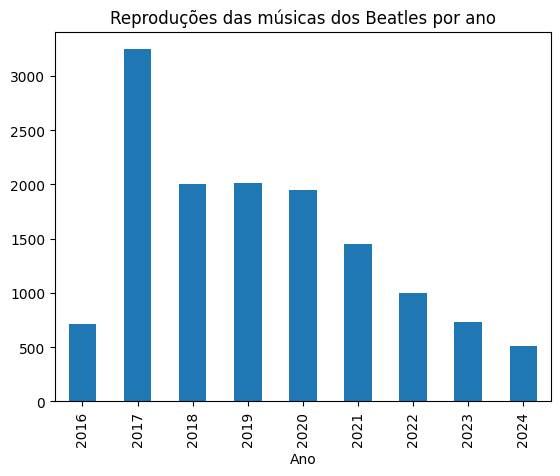

In [195]:
#Descobrir o total de reproduções do The Beatles através de um gráfico
df_beatles['Ano'].value_counts().sort_index().plot(kind='bar', title='Reproduções das músicas dos Beatles por ano')


Pode-se observar que a popularidade dos Beatles atingiu seu ápice em 2017,
mas vem enfrentando uma grande decadência com o passar do tempo

Sabendo quem dominou os streams ao longos do ano,
vamos dar uma olhada minusiosa no decorrer dos anos

In [196]:
# Agrupa por ano e artista, conta as reproduções e reseta o índice
artistas_ano = df.groupby(['Ano', 'Nome_Artista']).size().reset_index(name='Reproducoes')


In [197]:
#Descobrir os artistas mais ouvidos de cada ano
mais_ouvidos = artistas_ano.sort_values(['Ano', 'Reproducoes'], ascending=[True, False])
mais_ouvidos_top = mais_ouvidos.groupby('Ano').first().reset_index()




In [198]:
print(mais_ouvidos_top)


     Ano Nome_Artista  Reproducoes
0   2013   John Mayer           34
1   2014         Blur            2
2   2015   The Script          123
3   2016  The Beatles          715
4   2017  The Beatles         3244
5   2018  The Beatles         2006
6   2019  The Beatles         2015
7   2020  The Killers         2054
8   2021  The Beatles         1450
9   2022  The Beatles          999
10  2023  The Beatles          730
11  2024  The Beatles          511


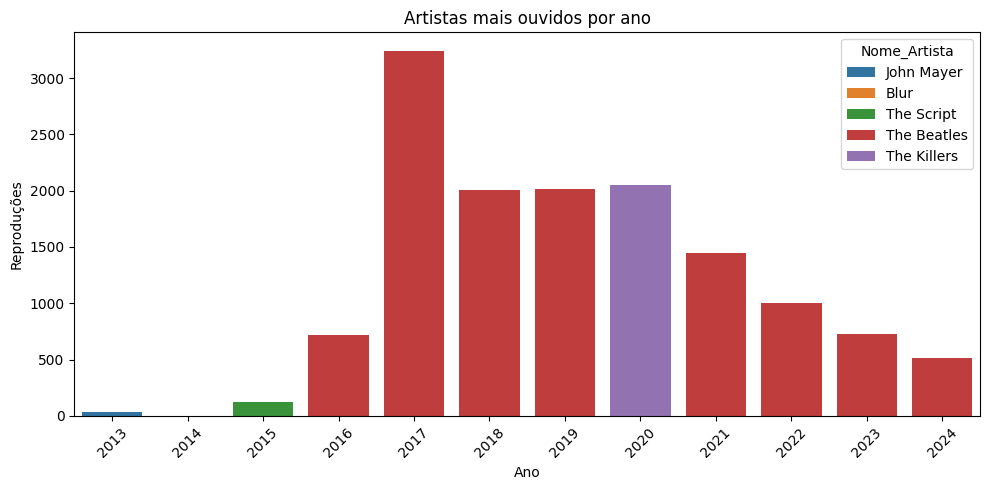

In [199]:
#Criando um gráfico com essas informações
plt.figure(figsize=(10,5))
sns.barplot(data=mais_ouvidos_top, x='Ano', y='Reproducoes', hue='Nome_Artista', dodge=False)
plt.title("Artistas mais ouvidos por ano")
plt.ylabel("Reproduções")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Podemos ver, que apesar da popularidade dos Beatles ter caido a medida que os anos pasassem, eles continuram sendo os mais ouvidos na maioria dos anos

Como o objetivo da análise foi concluído, irei trazer algumas outras análises secundarias para curiosidade, e testar a criação de alguns gráficos

<Axes: title={'center': 'Tempo escutado por ano (horas)'}, xlabel='Ano'>

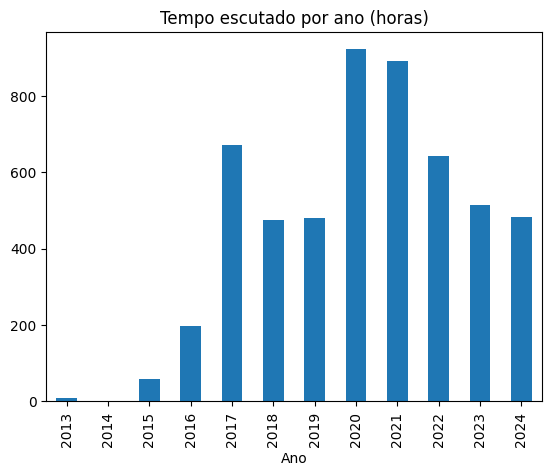

In [200]:
#Descobrir quanto tempo de música foi escutado em cada ano
tempo_por_ano = df.groupby('Ano')['Mi_Tocados'].sum() / (1000 * 60 * 60)  # horas
tempo_por_ano.plot(kind='bar', title='Tempo escutado por ano (horas)')


Com esse gráfico, fica muito fácil visualizar o período que mais foi escutado música, que são os anos de 2020 e 2021, anos que o mundo todo estava em casa devido a pandemia do corona vírus

Os ouvintes, preferem ouvir as músicas na ordem "correta" ou utilizam da opção aleatória?

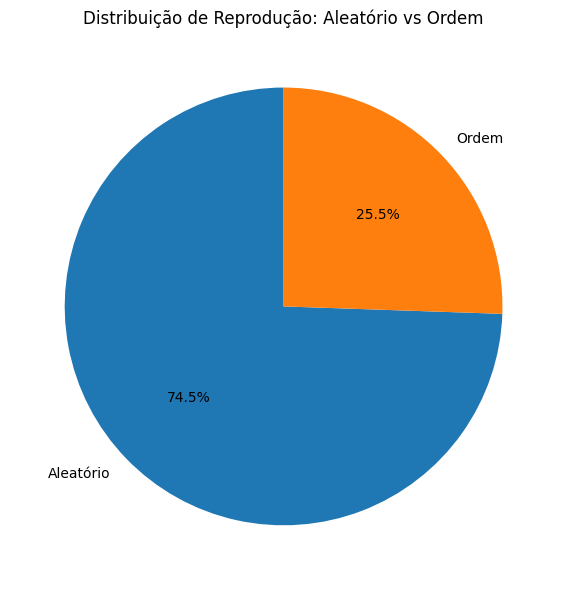

In [201]:
#Descobrir se as músicas são em ordem ou no aleatório
modo_aleatorio = df['Modo_Aleatorio'].value_counts(normalize=True) * 100

modo_aleatorio.index = modo_aleatorio.index.map({True: "Aleatório", False: "Ordem"})

plt.figure(figsize=(6,6))
modo_aleatorio.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=["#1f77b4", "#ff7f0e"])
plt.title("Distribuição de Reprodução: Aleatório vs Ordem")
plt.ylabel("")  # Tira o rótulo do eixo y
plt.tight_layout()
plt.show()


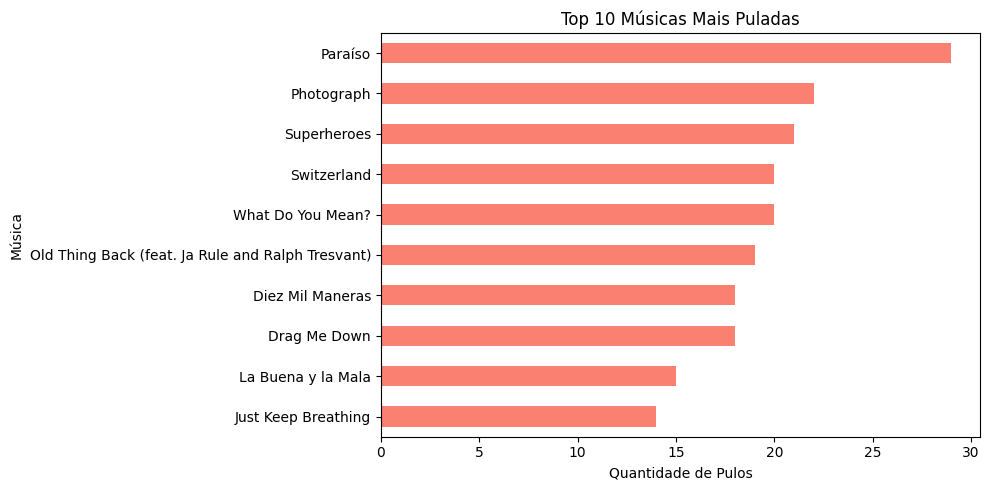

In [202]:
#Descobrir as músicas mais puladas

musicas_puladas = df[df['Pulada'] == True]['Nome_Musica'].value_counts().head(10)

plt.figure(figsize=(10,5))
musicas_puladas.plot(kind='barh', color='salmon')
plt.title("Top 10 Músicas Mais Puladas")
plt.xlabel("Quantidade de Pulos")
plt.ylabel("Música")
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()

